# Overfitting

1. Nous allons génèrer des données et les sépare selon un **train set** et un **test set**.
2. Nous allons ensuite entraîner plusieurs **modèles polynomiaux** de différents degrés et mesurer leurs **erreurs (erreur quadrratique moyenne, MSE)** respectives sur le train set et sur le test set.
3. La relation entre la complexité du modèle et leurs erreurs respective permet de comprendre le concept d'**overfitting**.

## Librairies

In [73]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

## Create dataset

Le code suivant permet de générer des **data bruitées** selon la fonction

$$
f(x) = 3x^3 - 2x^2 + 7x + 13 + \epsilon
$$

où $\epsilon$ est un bruit normal (gaussien) de mooyenne $\mu = 0$ et déviation stadard $\sigma = 500$.

In [74]:
def f(x):
    
    return 3*x**3 - 2*x**2 + 7*x + 13

In [75]:
X = np.random.uniform(-10, 10, size=(300))
y = f(X) + np.random.normal(0, 500, size=(300))

Splittez vos data en un **train set (80%)** et un **test set (20%)**.
- Le **train set** est utilisé pour **entraîner** les modèles.
- Le **train set** est utilisé pour **évaluer** la performance des modèles.

Utiliser la fonction `train_test_split(...)`:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240,), (60,), (240,), (60,))

In [78]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 1), (60, 1), (240,), (60,))

Faites les graphe (plot) de vos data. Les points du train set et du test set devrons être de différeentes couleurs.

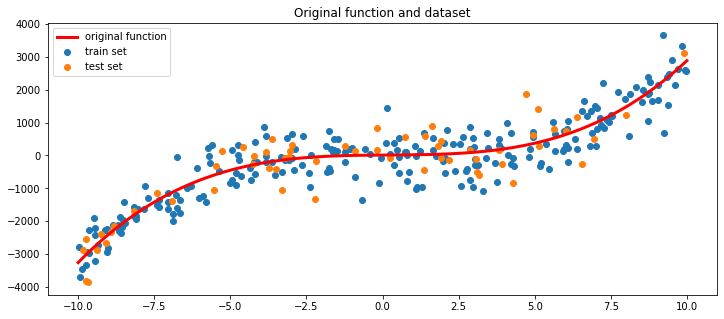

In [79]:
plt.figure(figsize=(12, 5))


x_points = np.linspace(-10, 10, num=100)
plt.plot(x_points, f(x_points), label="original function", color="red", linewidth=3)

plt.scatter(X_train, y_train, label="train set")
plt.scatter(X_test, y_test, label="test set")

plt.title('Original function and dataset')
plt.legend()
plt.show()

## Models

### Linear regression

Entraînez (fittez) une **régression linéaire** (`LinearRegression`) sur votre **train set** et évaluez votre modèle sur le **test set**.

L'entraînement d'un modèle comprend toujours les $4$ étapes suivantes:
1. **Instanciation:** création du modèle.
2. **Entraînement:**  entraîner (fitter) le modèle sur le **train set** (méthode `fit`).
3. **Prédictions:** prédire les données du **test set** (et du **train set** également, si besoin) (méthode `predict`).
4. **Résultats:** calculer l'erreur quadratique moyenne (`mean_squared_error`) de votre modèle sur le **test set** (et sur le **train set** également, si besoin).

Référez-vous à la documentation de la **régression linéaire** (`LinearRegression`) et de l'erreur quadratique moyenne (`mean_squared_error`) pour plus de précisions:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [80]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

In [81]:
err_train = mean_squared_error(y_train, y_train_preds)
err_test = mean_squared_error(y_test, y_test_preds)

err_train, err_test

(496006.3933820613, 627886.6841455888)

### Polynomial regressions

Entraînez (fittez) des **régressions polynomiales** (`PolynomialFeatures`) de degrés $1$ à $10$ sur votre **train set** et évaluez vos modèles sur le **test set**.

L'entraînement d'une **régression polynomiale** comprend les étapes suivante:
1. **Transformation des inputs:** transformation des inputs `X` en des inputs `X_poly` de degré suprérieur.
2. **Instanciation:** création d'une régression linéaire.
3. **Entraînement:**  entraîner (fitter) votre régression linéaire sur le **train set** avec les inputs transformées `X_poly` (méthode `fit`).
4. **Prédictions:** prédire les données du **test set** (et du **train set** également, si besoin) (méthode `predict`).
5. **Résultats:** calculer l'erreur quadratique moyenne (`mean_squared_error`) de votre modèle sur le **test set** (et sur le **train set** également, si besoin).

Référez-vous à la documentation de la **régressions polynomiale** (`PolynomialFeatures`) pour plus de précisions:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [82]:
max_complexity = 11

train_test_errors = []

for n in range(1, max_complexity):
        
    poly_fts = PolynomialFeatures(n)
    X_train_new = poly_fts.fit_transform(X_train)#.reshape(-1, 1)
    X_test_new = poly_fts.transform(X_test)#.reshape(-1, 1)
        
    lr = LinearRegression()
    lr.fit(X_train_new, y_train)
    
    y_train_preds = lr.predict(X_train_new)
    y_test_preds = lr.predict(X_test_new)
    
    err_train = mean_squared_error(y_train, y_train_preds)
    err_test = mean_squared_error(y_test, y_test_preds)
    
    train_test_errors.append((err_train, err_test))

In [83]:
train_test_errors

[(496006.3933820613, 627886.6841455889),
 (491833.43237262894, 591464.955269803),
 (245489.9738471744, 285396.5506460667),
 (245466.1056666948, 285467.9524326263),
 (242223.69315359014, 296861.6359390712),
 (242121.04748955867, 297133.06626229116),
 (241797.84195687989, 296678.71834586805),
 (241477.13090475494, 298850.19641490333),
 (239071.7584018506, 300793.4451547033),
 (238858.98351044965, 303648.53190954763)]

Faites les graphe des **erreurs quadratiques moyennes (MSE)** sur le train set et sur le test set en fonction de la **complexité** polynomiale de votre modèle. 

Vous devriez faire apparaîtrre une petite situation d'**overfitting**. Quel est le meilleur modèle?

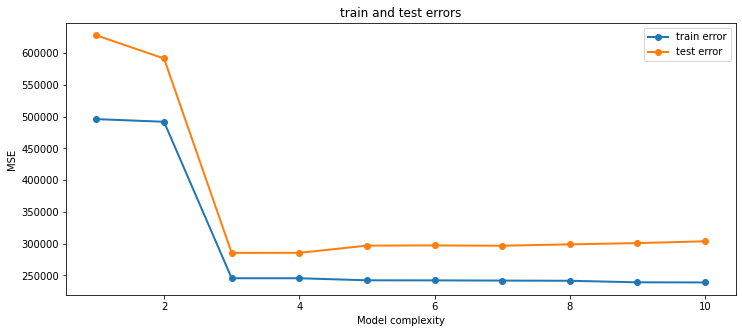

In [84]:
plt.figure(figsize=(12, 5))

poly_degrees = list(range(1, max_complexity))
train_errors = [x[0] for x in train_test_errors]
test_errors = [x[1] for x in train_test_errors]

plt.plot(poly_degrees, train_errors, marker="o", label="train error", linewidth=2)
plt.plot(poly_degrees, test_errors, marker="o", label="test error", linewidth=2)

plt.xlabel("Model complexity")
plt.ylabel("MSE")
plt.title('train and test errors')
plt.legend()
plt.show()